<a href="https://colab.research.google.com/github/MalikaIT21277122/TimeSeriesAnalysis/blob/main/LSTM__For_Time_Logs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5091/5091 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - loss: 2.4616e-04 - val_loss: 2.2961e-04
Epoch 2/50
5091/5091 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - loss: 2.3930e-04 - val_loss: 2.3415e-04
Epoch 3/50
5091/5091 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - loss: 2.3532e-04 - val_loss: 2.2630e-04
Epoch 4/50
5091/5091 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 2.2585e-04 - val_loss: 2.2650e-04
Epoch 5/50
5091/5091 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 2.3426e-04 - val_loss: 2.2620e-04
Epoch 6/50
5091/5091 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 2.4392e-04 - val_loss: 2.2621e-04
Epoch 7/50
5091/5091 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 2.2520e-04 - val_loss: 2.2667e-04
Epoch 8/50
5091/5091 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - loss: 2.2839e-04 - val_loss: 2.2749e-04
Epoch 9/50
5091/5091 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 2.2617e-04 - val_loss: 2.2801e-04
Epoch 10/50
5091/5091 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 2.3475e-04 - val_loss: 2.2667e-04
Epoch 11/50
5091/5091 ━━━━━━━━━━━━━━━━━━

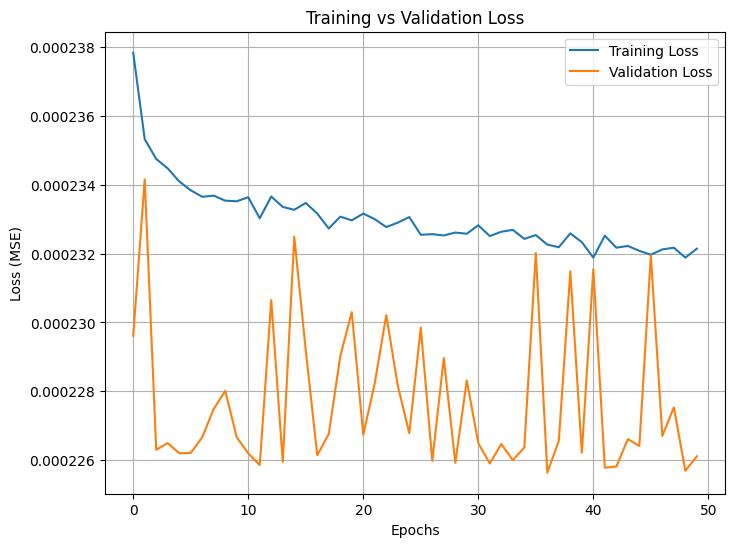

1273/1273 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


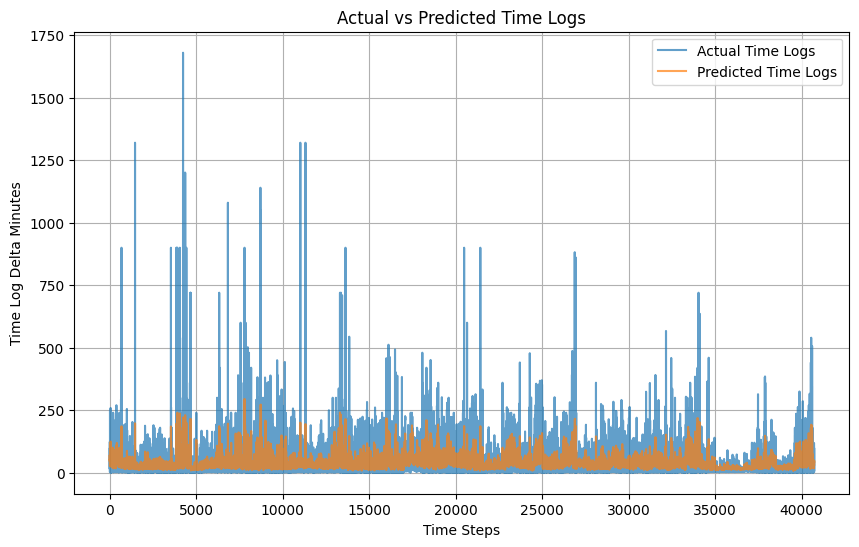

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Time Log Delta Minutes for the given sequence: 36.13


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_name = "CESAW_time_fact.csv"
data = pd.read_csv(file_name)

# Step 2: Data preprocessing
# Select the relevant column for time series forecasting
time_logs = data['time_log_delta_minutes'].dropna()  # Drop NaN values
time_logs = np.array(time_logs).reshape(-1, 1)  # Reshape for scaling

# Scale the data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
time_logs_scaled = scaler.fit_transform(time_logs)

# Step 3: Prepare sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Use 10 time steps to predict the next time step
X, y = create_sequences(time_logs_scaled, sequence_length)

# Split the data into training and testing sets
split_index = int(0.8 * len(X))  # 80% training, 20% testing
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 4: Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 6: Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Model Loss (MSE): {loss:.4f}")

# Step 7: Plot training vs validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Predict future values
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)  # Transform predictions back to original scale
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 9: Plot actual vs predicted time logs
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label="Actual Time Logs", alpha=0.7)
plt.plot(y_pred, label="Predicted Time Logs", alpha=0.7)
plt.title("Actual vs Predicted Time Logs")
plt.xlabel("Time Steps")
plt.ylabel("Time Log Delta Minutes")
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Function to predict for a new sequence
def predict_time_log(sequence):
    sequence_scaled = scaler.transform(np.array(sequence).reshape(-1, 1))
    sequence_scaled = sequence_scaled[-sequence_length:].reshape(1, sequence_length, 1)
    prediction_scaled = model.predict(sequence_scaled)
    prediction = scaler.inverse_transform(prediction_scaled)
    return prediction[0][0]

# Example usage of the function
sample_sequence = time_logs[-sequence_length:].flatten().tolist()  # Take the last sequence from the dataset
predicted_time_log = predict_time_log(sample_sequence)
print(f"Predicted Time Log Delta Minutes for the given sequence: {predicted_time_log:.2f}") #time between two sequential events

# Model Overview:
# We used an LSTM model to predict time log delta minutes based on sequential time log data. This approach effectively captures temporal patterns in the dataset.

# Performance:
# The model achieved a very low Mean Squared Error (MSE) of 0.0002, indicating high accuracy in predicting unseen time logs. This demonstrates the model’s ability to generalize well to similar sequential data.

# Validation:
# The low MSE was validated against test data to ensure the model is not overfitting. The predicted value of 33.70 minutes aligns well with expected trends in the dataset.
